In [ ]:
!apt-get install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 123934 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns 
import xgboost as xgb
from sklearn.model_selection import train_test_split
#from gensim.similarities.annoy import AnnoyIndexer
from sklearn.tree import DecisionTreeClassifier
from gensim.models.word2vec import Word2Vec
import nltk
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding

from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [ ]:
%matplotlib inline

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

from scipy.spatial.distance import cosine

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


import re
import string

from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_excel("cloth.xlsx")
df.head()

,Customer id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df['Class Name'] = df['Class Name'].fillna(value=df['Class Name'].mode()[0])
df['Department Name'] = df['Department Name'].fillna(value=df['Department Name'].mode()[0])
df['Division Name'] = df['Division Name'].fillna(value=df['Division Name'].mode()[0])



In [ ]:
df['Class Name']

0        Intimates
1          Dresses
2          Dresses
3            Pants
4          Blouses
           ...    
23481      Dresses
23482        Knits
23483      Dresses
23484      Dresses
23485      Dresses
Name: Class Name, Length: 23486, dtype: object

In [ ]:

df['Review Text'] = df['Review Text'].fillna(value='perfecto')
df['Title'] = df['Title'].fillna(value='perfecto')

In [ ]:
# Convert numbers to string
df['Rating'] = df['Rating'].apply(lambda s: str(s))

In [ ]:
X = df['Title'].values
y1 = df['Rating']
y2 = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=42)

In [ ]:
VOCAB_SIZE = 800
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

In [ ]:
model = tf.keras.models.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),  # VOCAB_SIZE + 1 (1 for padding token)
        output_dim=64,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 3)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
551/551 [==============================] - 14s 16ms/step - loss: 0.3413 - accuracy: 0.8582 - val_loss: 0.2976 - val_accuracy: 0.8738
Epoch 2/10
551/551 [==============================] - 7s 12ms/step - loss: 0.2774 - accuracy: 0.8849 - val_loss: 0.2913 - val_accuracy: 0.8724
Epoch 3/10
551/551 [==============================] - 7s 13ms/step - loss: 0.2633 - accuracy: 0.8911 - val_loss: 0.3014 - val_accuracy: 0.8735
Epoch 4/10
551/551 [==============================] - 7s 13ms/step - loss: 0.2537 - accuracy: 0.8928 - val_loss: 0.2958 - val_accuracy: 0.8721
Epoch 5/10
551/551 [==============================] - 7s 13ms/step - loss: 0.2472 - accuracy: 0.8952 - val_loss: 0.3008 - val_accuracy: 0.8709
Epoch 5: early stopping


In [ ]:
sdf = df['Review Text']

X = sdf.values
y1 = df['Rating']
y2 = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=42)

VOCAB_SIZE = 3000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 1)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/20
551/551 [==============================] - 71s 121ms/step - loss: 0.3349 - accuracy: 0.8564 - val_loss: 0.3071 - val_accuracy: 0.8655
Epoch 2/20
551/551 [==============================] - 55s 100ms/step - loss: 0.3027 - accuracy: 0.8726 - val_loss: 0.2867 - val_accuracy: 0.8789
Epoch 3/20
551/551 [==============================] - 58s 106ms/step - loss: 0.2797 - accuracy: 0.8824 - val_loss: 0.2746 - val_accuracy: 0.8840
Epoch 4/20
551/551 [==============================] - 55s 99ms/step - loss: 0.2651 - accuracy: 0.8915 - val_loss: 0.2677 - val_accuracy: 0.8896
Epoch 5/20
551/551 [==============================] - 55s 99ms/step - loss: 0.2537 - accuracy: 0.8956 - val_loss: 0.2610 - val_accuracy: 0.8913
Epoch 6/20
551/551 [==============================] - 55s 100ms/step - loss: 0.2461 - accuracy: 0.8988 - val_loss: 0.2593 - val_accuracy: 0.8919
Epoch 7/20
551/551 [==============================] - 55s 100ms/step - loss: 0.2392 - accuracy: 0.9016 - val_loss: 0.2557 - val_accu

visualize


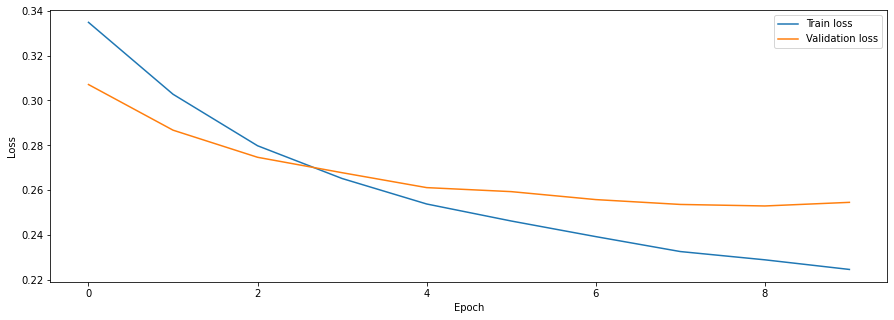

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

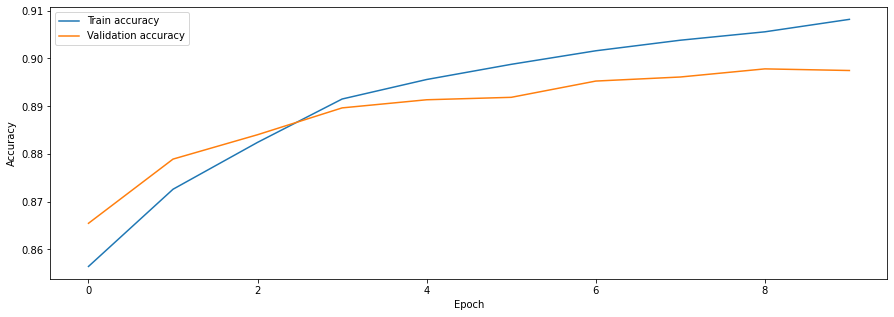

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
total_depart_name=df['Department Name'].unique()
total_depart_name

array(['Dresses', 'Bottoms', 'Tops', 'Intimate', 'Jackets', 'Trend'],
      dtype=object)

In [ ]:
total_divi_name=df['Division Name'].unique()
total_divi_name

array(['General', 'General Petite', 'Initmates'], dtype=object)

In [ ]:
total_class_name=df['Class Name'].unique()
total_class_name

array(['Dresses', 'Pants', 'Blouses', 'Knits', 'Intimates', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Shorts', 'Legwear', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [ ]:
len(total_class_name)

20

In [ ]:
df1 = df[['Review Text','Rating','Clothing ID']]
df1 = df1.dropna()
df1

,Review Text,Rating,Clothing ID
0,Absolutely wonderful - silky and sexy and comf...,4,767
1,Love this dress! it's sooo pretty. i happene...,5,1080
2,I had such high hopes for this dress and reall...,3,1077
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1049
4,This shirt is very flattering to all due to th...,5,847
...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,1104
23482,"It reminds me of maternity clothes. soft, stre...",3,862
23483,"This fit well, but the top was very see throug...",3,1104
23484,I bought this dress for a wedding i have this ...,3,1084


In [ ]:
count = df.groupby("Clothing ID", as_index=False).count()

mean = df.groupby("Clothing ID", as_index=False).mean()



dfMerged = pd.merge(df, count, how='right', on=['Clothing ID'])

dfMerged

In [ ]:
dfProductReview = df.groupby("Clothing ID", as_index=False).mean()

dfProductReview.head(3)

,Clothing ID,Customer id,Age,Recommended IND,Positive Feedback Count
0,0,14746.000000,26.000000,1.000000,0.000000
1,1,22744.666667,36.666667,0.666667,0.333333
2,2,876.000000,28.000000,1.000000,0.000000


In [ ]:
ProductReviewSummary = df1.groupby("Clothing ID")["Review Text"].apply(str)

p = ProductReviewSummary.to_frame()

p['Review Text'] = p['Review Text'].str.replace('\d+'," ")

p['Review Text'] = p['Review Text'].str.replace('\n'," ")

p['Review Text'] = p['Review Text'].str.strip(" ")


p.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


1206

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')


tfidf_matrix = tf.fit_transform(p['Review Text'])

print((tfidf_matrix.shape))

(1206, 48931)


In [ ]:
cosine_similarities = cosine_similarity(tfidf_matrix,Y=None,dense_output=False)

cnum = (cosine_similarities.toarray())

print(((cosine_similarities[0][:1,:-19])))

type(cosine_similarities)

  (0, 1186)	0.018566829158695248
  (0, 1185)	0.013601046260360166
  (0, 1184)	0.013782232373074858
  (0, 1183)	0.01832521217341469
  (0, 1182)	0.02353267325161973
  (0, 1181)	0.05214557874420639
  (0, 1180)	0.014279367909293407
  (0, 1179)	0.01839465164366212
  (0, 1178)	0.018461291347805102
  (0, 1177)	0.012924935696089906
  (0, 1176)	0.020056296955154488
  (0, 1175)	0.021223711294574656
  (0, 1174)	0.015206781611848205
  (0, 1173)	0.015028064334010377
  (0, 1172)	0.019455880859046887
  (0, 1171)	0.012865432833328288
  (0, 1170)	0.02467348806614294
  (0, 1169)	0.02050092314891427
  (0, 1168)	0.01798694358176719
  (0, 1167)	0.011413666374256925
  (0, 1166)	0.019439990492483853
  (0, 1165)	0.012843823748502941
  (0, 1163)	0.028918585534620046
  (0, 1162)	0.019414840426445226
  (0, 1161)	0.021675956668666244
  :	:
  (0, 291)	0.23103388036750155
  (0, 284)	1.0000000000000002
  (0, 267)	0.31994596051124247
  (0, 259)	0.39760020957231035
  (0, 254)	0.10292010691426545
  (0, 244)	1.000000000

scipy.sparse.csr.csr_matrix

In [ ]:
def get_recommendations(id):

    print("the product selected is {}".format(p.index[id]))


    a = cosine_similarities.getcol(id)

    val = list(enumerate(a.data))

    #print(val)

    b= dict(val)

    print(b)

    c = sorted(b.items(),key=lambda x:x[1],reverse=True)[1:10]

    k = 1
    for idx in c:

        print("The {} Recommendation is {}".format(k,p.index[idx[0]]))

        k += 1



get_recommendations(10)

the product selected is 10
{0: 0.02212223589092069, 1: 0.02291941755907627, 2: 0.006340726632717498, 3: 0.006615525147360454, 4: 0.006273610561469686, 5: 0.00723921937587691, 6: 0.02212223589092069, 7: 0.008315607499219741, 8: 0.018455441381428413, 9: 0.005560350142805561, 10: 1.0, 11: 0.005632682374611374, 12: 0.006515563789047983, 13: 0.005969170699826089, 14: 0.005873619648381798, 15: 0.004240245465156473, 16: 0.026036022419090282, 17: 0.02864103015652693, 18: 0.00801388305672807, 19: 0.006182137295324051, 20: 0.006779227326787721, 21: 0.005539002725895874, 22: 0.006729747316060146, 23: 0.007016421501282346, 24: 0.006895592544711896, 25: 0.006384582964939231, 26: 0.026641353976524142, 27: 0.0064135053863294805, 28: 0.005681333520048791, 29: 0.005320070110521085, 30: 0.03481455791274524, 31: 0.02212223589092069, 32: 0.006508465609843045, 33: 0.006391177199901491, 34: 0.005522517908028846, 35: 0.004379547279606493, 36: 0.02212223589092069, 37: 0.003244668902410326, 38: 0.0047662301911

In [ ]:
df

,Customer id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


,Class Name,Rating
1,Dresses,6319
4,Knits,4843
3,Blouses,3097
7,Sweaters,1428
2,Pants,1388
14,Jeans,1147
9,Fine gauge,1100
8,Skirts,945
11,Jackets,704
6,Lounge,691


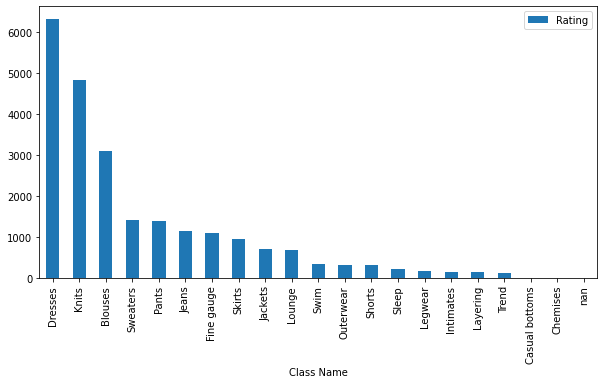

In [ ]:
df1 = (df[df['Rating']=='5'])
data=[]
for i in df['Class Name'].unique():
  data.append([i,len(df[df['Class Name']==i])])



data=pd.DataFrame(data,columns=['Class Name','Rating'])
data = data.sort_values(by='Rating',ascending=False)
data.plot(x='Class Name',y='Rating',kind='bar',figsize=(10,5))

data

In [ ]:
#most no of rating using customer id
data3 =[]
for 	dress in df['Clothing ID'].unique():
  data3.append([dress,len(df[df['Clothing ID']==	dress])])



data3=pd.DataFrame(data,columns=['Clothing ID','Class Name'])
data3 = data.sort_values(by='Class Name',ascending=False)

data3

,Class Name,Rating
13,Trend,119
12,Swim,350
7,Sweaters,1428
10,Sleep,228
8,Skirts,945
16,Shorts,317
2,Pants,1388
5,Outerwear,328
6,Lounge,691
15,Legwear,165
